In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import math
from scipy.optimize import curve_fit



In [2]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

def pol_func(x, a, b, c,d):
    return a + b*x + c*x*x + d*x*x*x


In [3]:
def avalange_gain(distance, gamma):
    gAV = math.exp(gamma*distance)
    return gAV
    

In [4]:
# this calculates gamma as a function of the electric field as for reference [4]
def ionization_coeff(eField, mode=0,drawME=False):
    #lucky model implementation
    fullDots     = pd.read_csv("AlphaFigure.csv",usecols=[0 ,1 ])#, delim_whitespace=True)
    fullTri      = pd.read_csv("AlphaFigure.csv",usecols=[2 ,3 ])#, delim_whitespace=True)
    fullSquares  = pd.read_csv("AlphaFigure.csv",usecols=[4 ,5 ])#, delim_whitespace=True)
    emptyDots    = pd.read_csv("AlphaFigure.csv",usecols=[6 ,7 ])#, delim_whitespace=True)
    emptyTri     = pd.read_csv("AlphaFigure.csv",usecols=[8 ,9 ])#, delim_whitespace=True)
    emptySquares = pd.read_csv("AlphaFigure.csv",usecols=[10,11])#, delim_whitespace=True)
    line         = pd.read_csv("AlphaFigure.csv",usecols=[12,13])#, delim_whitespace=True)

    fullDots     = fullDots     .iloc[1:,:]
    fullTri      = fullTri      .iloc[1:,:]
    fullSquares  = fullSquares  .iloc[1:,:]
    emptyDots    = emptyDots    .iloc[1:,:]
    emptyTri     = emptyTri     .iloc[1:,:]
    emptySquares = emptySquares .iloc[1:,:]
    line         = line         .iloc[1:,:]
    if drawME:
        fig,ax = plt.subplots()
        ax = line  .plot(x="lineX"       ,y="lineY"       , grid=True, label='lucky model')# ,logy=True)
        fullTri    .plot(ax=ax, x="FullTriX"    ,y="FullTriY"    , grid=True, label='IS 4  um',linestyle='None',marker="^")#,logy=True)
        fullDots   .plot(ax=ax, x="FullDotsX"   ,y="FullDotsY"   , grid=True, label='IS 7  um',linestyle='None',marker="o")#,logy=True)
        fullSquares.plot(ax=ax, x="FullSquaresX",y="FullSquaresY", grid=True, label='IS 33 um',linestyle='None',marker="s")#,logy=True)
    
        emptyTri    .plot(ax=ax, x="EmptyTriX"    ,y="EmptyTriY"    , grid=True, label='BS 8  um',linestyle='None',marker="^",fillstyle="none")#,logy=True)
        emptyDots   .plot(ax=ax, x="EmptyDotsX"   ,y="EmptyDotsY"   , grid=True, label='BS 15 um',linestyle='None',marker="o",fillstyle="none")#,logy=True)
        emptySquares.plot(ax=ax, x="EmptySquaresX",y="EmptySquaresY", grid=True, label='BS 35 um',linestyle='None',marker="s",fillstyle="none")#,logy=True)
        #line.plot(x="lineX",y="lineY")#,logy=True)
        ax.set_ylabel('Gamma P [1/um]')
        ax.set_xlabel('1/F [um/V]')
    
        fig1,ax1 = plt.subplots()
    x = line["lineX"]
    y = line["lineY"]
    if mode ==0:
        if drawME:
            line.plot(ax = ax1, x="lineX"       ,y="lineY"       , grid=True, label='lucky model' ,logy=True)
    elif mode == 1:
        x = fullTri["FullTriX"].dropna()
        y = fullTri["FullTriY"].dropna()
        if drawME:
            fullTri.plot(ax=ax1, x="FullTriX"    ,y="FullTriY"    , grid=True, label='IS 4  um',linestyle='None',marker="^",logy=True)
    elif mode == 2:
        x = fullDots["FullDotsX"].dropna()
        y = fullDots["FullDotsY"].dropna()
        if drawME:
            fullDots.plot(ax=ax1, x="FullDotsX"    ,y="FullDotsY"    , grid=True, label='IS 7  um',linestyle='None',marker="o",logy=True)
    elif mode == 3:
        x = fullSquares["FullSquaresX"].dropna()
        y = fullSquares["FullSquaresY"].dropna()
        if drawME:
            fullSquares.plot(ax=ax1, x="FullSquaresX"    ,y="FullSquaresY"    , grid=True, label='IS 33  um',linestyle='None',marker="s",logy=True)
    elif mode == 4:
        x = emptyTri["EmptyTriX"].dropna()
        y = emptyTri["EmptyTriY"].dropna()
        if drawME:
            emptyTri.plot(ax=ax1, x="EmptyTriX"    ,y="EmptyTriY"    , grid=True, label='BS 8  um',linestyle='None',marker="^",fillstyle="none")
    elif mode == 5:
        x = emptyDots["EmptyDotsX"].dropna()
        y = emptyDots["EmptyDotsY"].dropna()
        if drawME:
            emptyDots.plot(ax=ax1, x="EmptyDotsX"    ,y="EmptyDotsY"    , grid=True, label='BS 15  um',linestyle='None',marker="o",fillstyle="none",logy=True)
    elif mode == 6:
        x = emptySquares["EmptySquaresX"].dropna()
        y = emptySquares["EmptySquaresY"].dropna()
        if drawME:
            emptySquares.plot(ax=ax1, x="EmptySquaresX"    ,y="EmptySquaresY"    , grid=True, label='BS 35  um',linestyle='None',marker="s",fillstyle="none",logy=True)
    else:
        return 0.32
        
    popt, pcov = curve_fit(exp_func, x, y)
    if drawME:
        plt.plot (x, exp_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
        plt.legend()
        ax1.set_ylabel('Gamma P [1/um]')
        ax1.set_xlabel('1/F [um/V]')
    #plt.show()
    gamma = exp_func(1/eField, *popt)
    return gamma

In [5]:
# this calculates gamma as a function of the electric field as for reference [4]
def mobility(eField,drawME=False):
    mobData = pd.read_csv("MobData.csv")#, delim_whitespace=True)
    mobData["u"] = 0.1*mobData["u"] #change of units I want mobility in um2/(V*ns)
    x = mobData["V"]
    y = mobData["u"]
    popt, pcov = curve_fit(pol_func, x, y)

    if drawME:
        ax = mobData.plot(x="V",y="u", grid=True, label='line',linestyle='None',marker="o",fillstyle="none")
        ax.set_ylabel('Mobility [um2/(V ns)]')
        ax.set_xlabel('F [V/um]')
        plt.plot (x, pol_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
        plt.legend()
    mob = pol_func(eField, *popt) 
    return mob

0.08537794977858448

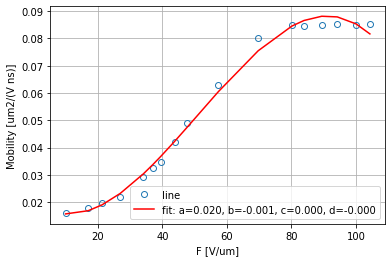

In [6]:
mobility(100,True)

In [7]:
def timeFromMobility(mob, distance, eField):
    #print("---------> ",mob, distance, eField, distance/(mob*eField))
    return distance/(mob*eField)
    

In [8]:
def holeCurent(distance, eField, gamma, time=1):
    mobH  = mobility(eField)
    timeH = timeFromMobility(mobH, distance, eField)
    #print(gamma*mobH*eField*time, "sssss", timeH)
    I   = math.exp(gamma*mobH*eField*time)
    I   *= 1e3*e*p0*mobH*eField/distance# this is in mA: (e is in nC and mu*eField/dist is in 1/ns)*1e9
    if time < timeH:
        return I
    else: 
        return 0

In [9]:
def elecCurent(distance, eField, gamma,time=1):
    mobE = 0.006
    mobH = mobility(eField)
    timeH = timeFromMobility(mobH, distance, eField)
    timeE = timeFromMobility(mobE, distance, eField)
    I   = 1
    if time < timeH:
        I   *= ( math.exp(gamma*mobH*eField*time) - math.exp(gamma*mobE*eField*time) )
    elif (time < timeE):
        I   *= ( math.exp(gamma*distance) - math.exp(gamma*mobE*eField*time) )
    else:
        return 0
    I   *= 1e3*e*n0*mobE*eField/distance# this is in mA: (e is in nC and mu*eField/dist is in 1/ns)*1e9
    return I

In [10]:
def sumCurent(distance, eField, gamma,time=1):
    return elecCurent(distance, eField, gamma,time=1) + holeCurent(distance, eField, gamma, time=1)

In [15]:
F      = 100 # Electric Field [V/um]
FAV    = 100 # Electric Field threshold for Avalanche Multiplication [V/um]
d      = 35#4  # A-Se distance between electrons [typically in units of um]
RIL    = 1 #Resistive Interface Layer
e      = 1.6e-10# elementary charge in nCoulomb
gammaP = 0.3#ionization_coeff(F,4) # default 0.32 hole impact ionization coefficient [1/um]
n0     = 10000 #number of electrons created by the light source
p0     = 10000 #number of holes created by the light source
#te     = 45 #electrons transit time [ns]
#th     = 2.5  #holes transit time [ns]


0.19082741848272003

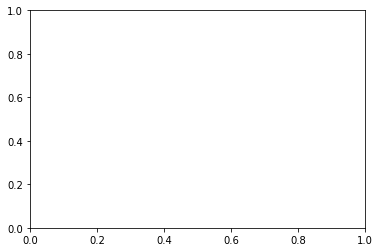

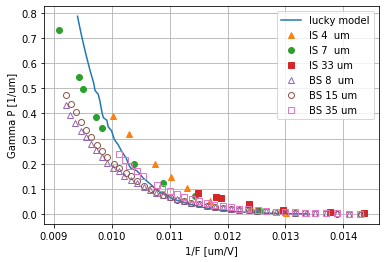

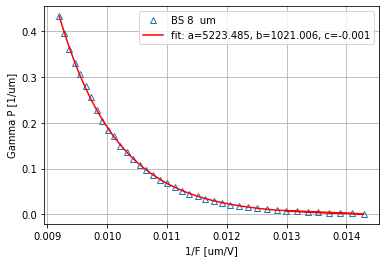

In [16]:
ionization_coeff(F,4,True)

In [17]:
t2  = np.linspace(0,60,120)

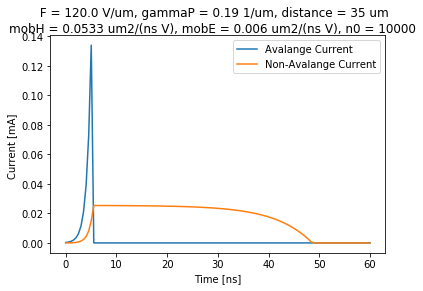

In [27]:
fh = np.vectorize(holeCurent)
fe = np.vectorize(elecCurent)
mobH = np.round_(mobility(F),4)
mobE = 0.006
fig,  ax2  = plt.subplots()
title =  " F = "+str(F)+" V/um, gammaP = "+str(gammaP)+" 1/um, distance = "+str(d)+" um\n"+"mobH = "+str(mobH)+" um2/(ns V), mobE = "+str(mobE)+" um2/(ns V), n0 = 10000"
fig.suptitle(title, fontsize=12)
ax2.set_ylabel("Current [mA] ")
ax2.set_xlabel("Time [ns]")
ax2.plot(t2 , fh(d,F,gammaP,t2) , label='Avalange Current')
ax2.plot(t2 , fe(d,F,gammaP,t2) , label='Non-Avalange Current')
#ax2.set_xlim(18000,26000)
ax2.legend()

 F = 70.0 V/um, gammaP = 0.0010300540214535194 1/um, distance = 35 um
mobH = 0.0758 um/(ns V), mobE = 0.006 um/(ns V)
 F = 75.0 V/um, gammaP = 0.005005586679368469 1/um, distance = 35 um
mobH = 0.0806 um/(ns V), mobE = 0.006 um/(ns V)
 F = 80.0 V/um, gammaP = 0.013582996871713672 1/um, distance = 35 um
mobH = 0.0844 um/(ns V), mobE = 0.006 um/(ns V)
 F = 85.0 V/um, gammaP = 0.030328816362011037 1/um, distance = 35 um
mobH = 0.087 um/(ns V), mobE = 0.006 um/(ns V)
 F = 90.0 V/um, gammaP = 0.060428353465456296 1/um, distance = 35 um
mobH = 0.0882 um/(ns V), mobE = 0.006 um/(ns V)
 F = 95.0 V/um, gammaP = 0.11092009357343165 1/um, distance = 35 um
mobH = 0.0877 um/(ns V), mobE = 0.006 um/(ns V)
 F = 100.0 V/um, gammaP = 0.19082741848272003 1/um, distance = 35 um
mobH = 0.0854 um/(ns V), mobE = 0.006 um/(ns V)
 F = 105.0 V/um, gammaP = 0.31117611401368245 1/um, distance = 35 um
mobH = 0.081 um/(ns V), mobE = 0.006 um/(ns V)
 F = 110.0 V/um, gammaP = 0.4849010987497204 1/um, distance = 35 u

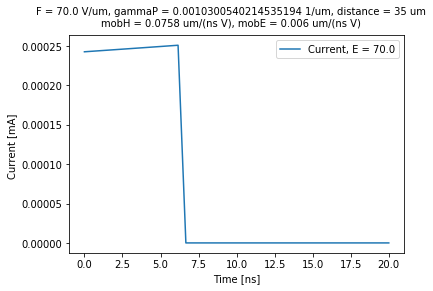

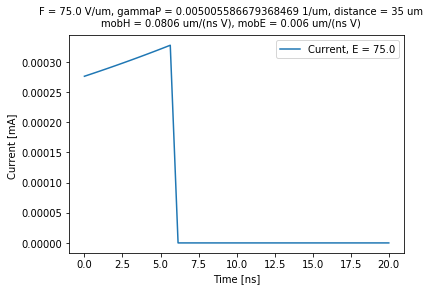

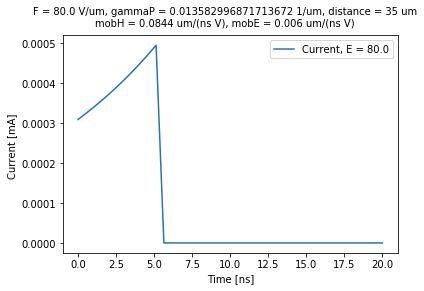

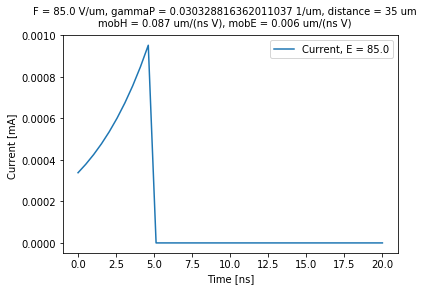

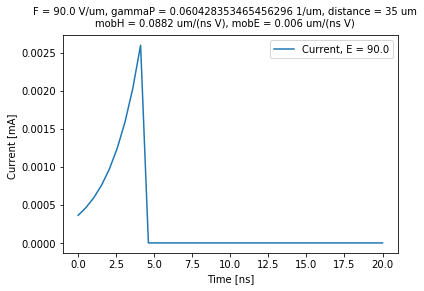

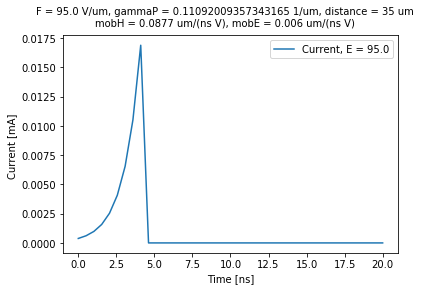

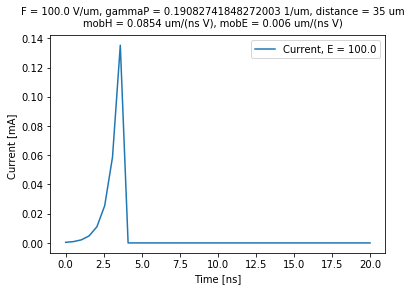

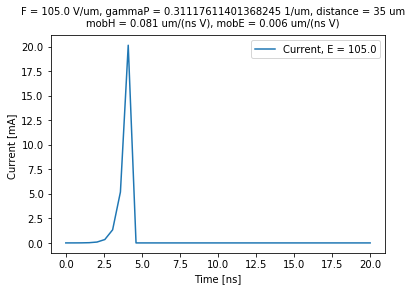

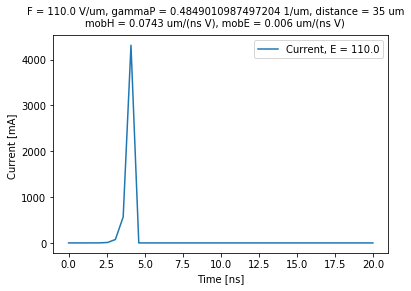

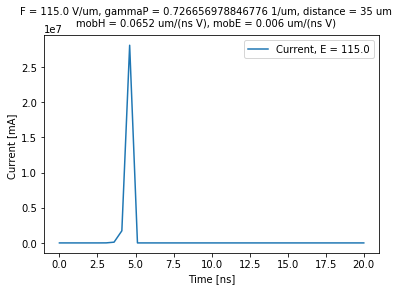

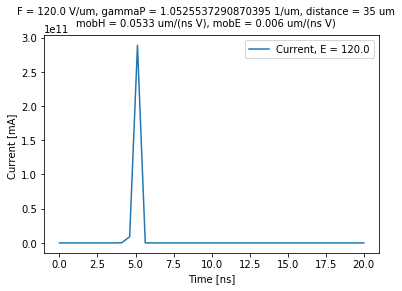

In [28]:
valEFieldRange = np.linspace(70,120,11) #Field Range
#t3             = np.linspace(0,5)       # Time Range
t3  = np.linspace(0,20,40)


dicMaxI = {}

fsum = np.vectorize(sumCurent)

for F in valEFieldRange:
    fig,  ax2  = plt.subplots()
    ax2.set_ylabel("Current [mA] ")
    ax2.set_xlabel("Time [ns]")

    gammaP = ionization_coeff(F,4)
    #mobH   = mobility(F)
    mobH = np.round_(mobility(F),4)
    title =  "F = "+str(F)+" V/um, gammaP = "+str(gammaP)+" 1/um, distance = "+str(d)+" um\n"+"mobH = "+str(mobH)+" um/(ns V), mobE = "+str(mobE)+" um/(ns V)"
    print(" F = "+str(F)+" V/um, gammaP = "+str(gammaP)+" 1/um, distance = "+str(d)+" um\n"+"mobH = "+str(mobH)+" um/(ns V), mobE = "+str(mobE)+" um/(ns V)")
    #title =  "Field Scan"
    fig.suptitle(title, fontsize=10)
    ax2.plot(t3 , fh(d,F,gammaP,t3) , label='Current, E = '+str(F))
#    ax2.plot(t2 , fe(d,F,gammaP,t2) , label='Non-Avalange Current, E = '+str(F))
#    ax2.set_xlim(0,20)
    ax2.legend()

